In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense
from keras.layers import LeakyReLU
import tensorflow as tf

from keras import layers

Using TensorFlow backend.


In [24]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #0 for activate , -1 for deactivate

In [30]:
data=pd.read_csv('hour.csv')

In [31]:
data = data.drop(['instant' , 'dteday' ] , axis=1    )
data.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
x = data.iloc[:, 0:12]

In [33]:
x.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [34]:
y= data.iloc[: , 12:14]

In [37]:
le_season = LabelEncoder()  ## แปลงcat เป็น numerical 
x[:, 0] = le_season.fit_transform(x[:, 0])
le_mnth = LabelEncoder()
x[:, 1] = le_mnth.fit_transform(x[:, 1])
le_hr = LabelEncoder()
x[:, 2] = le_hr.fit_transform(x[:, 2])
le_weekday = LabelEncoder()
x[:, 4] = le_weekday.fit_transform(x[:, 4])
le_weathersit = LabelEncoder()
x[:, 6] = le_weathersit.fit_transform(x[:, 6])

In [36]:
ohe = OneHotEncoder(categorical_features = [0,2,3,5,7])  ## ทำให้เป็น binary : year, holiday ,working day
x = ohe.fit_transform(x).toarray()


C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\peravit2\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
x_test

array([[-0.57106566,  1.71031679, -0.58933902, ...,  0.31171606,
         1.31751766,  0.27350893],
       [-0.57106566, -0.58468701, -0.58933902, ..., -0.21784314,
         1.31751766, -1.55552756],
       [-0.57106566, -0.58468701, -0.58933902, ..., -0.21784314,
        -0.60381308, -0.45843243],
       ...,
       [-0.57106566, -0.58468701,  1.69681622, ...,  0.66475553,
         0.53859979, -0.70186828],
       [ 1.75111213, -0.58468701, -0.58933902, ..., -1.36551269,
         0.38281622, -0.70186828],
       [-0.57106566, -0.58468701, -0.58933902, ..., -1.10044181,
        -0.34417379,  0.27350893]])

In [11]:
classifier = Sequential()
classifier.add(Dense(units = 80 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 58))
classifier.add(Dense(units = 60, activation = 'relu'))
classifier.add(layers.Dropout(0.2))
classifier.add(Dense(units = 50, activation = 'relu'))
classifier.add(Dense(units = 40, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'linear' ))

W0930 20:25:28.010715 16448 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 20:25:28.075535 16448 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 20:25:28.089504 16448 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 20:25:28.129399 16448 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0930 20:25:28.136378 16448 deprec

In [12]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

W0930 20:25:28.717792 16448 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
x.shape

(17379, 58)

In [14]:
classifier.fit(x_train, y_train, batch_size = 10, epochs = 10)

W0930 20:25:30.573202 16448 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
13903/13903 [==============================] - 9s 670us/step - loss: 3637.0192 - mean_squared_error: 3637.0192
Epoch 2/10
13903/13903 [==============================] - 4s 288us/step - loss: 1307.7563 - mean_squared_error: 1307.7563
Epoch 3/10
13903/13903 [==============================] - 4s 290us/step - loss: 1172.2828 - mean_squared_error: 1172.2828
Epoch 4/10
13903/13903 [==============================] - 4s 319us/step - loss: 1056.5040 - mean_squared_error: 1056.5040
Epoch 5/10
13903/13903 [==============================] - 4s 319us/step - loss: 1022.1005 - mean_squared_error: 1022.1005
Epoch 6/10
13903/13903 [==============================] - 4s 311us/step - loss: 984.7625 - mean_squared_error: 984.7625
Epoch 7/10
13903/13903 [==============================] - 4s 303us/step - loss: 938.9404 - mean_squared_error: 938.9404
Epoch 8/10
13903/13903 [==============================] - 4s 299us/step - loss: 902.5891 - mean_squared_error: 902.5891
Epoch 9/10
13903/13903 [======

In [16]:
score=classifier.evaluate(x_test,y_test,batch_size=32)

3476/3476 [==============================] - 0s 26us/step


In [16]:
y_pred = classifier.predict(x_test)

In [17]:
mean_squared_error(y_test, y_pred)

819.5207676517631

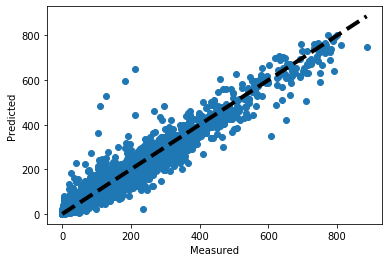

In [18]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()